In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("MarksClean2.csv")
print(df.isna().sum().sum())


0


In [4]:
def load_or_clean(clean=False, binaryPositions = False):
    if clean:
        print("Loading and cleaning dirty data...")
        df_pro = pd.read_excel('prosci_clean2.xlsx')
        df_pro = clean_df(df_pro, binaryPositions)
        print("Saving cleaned file...")
        df_pro.to_excel('prosci_clean2.xlsx')
    else:
        print("Loading cleaned data...")
        df_pro = pd.read_excel('prosci_clean.xlsx')
    return df_pro


def clean_df(df_pro, binaryPositions = False):
    df_pro['Penalty'].fillna(0, inplace=True)
    cols = ["SameJockey","ORWinner","ORWins","ORPlaced","HighClassWin", "GradeWinner", 
            "TopRTypeJockey", "LastBestSpeed", "LastBestSpeed3", "LastBestForm",  "LastBestForm3",
            "FutureEntry", "LastTimeWin", "NewTrain", "Noted", "SameCourse", "SameCourse_2",
            "HighGradeWinner", "TopRTypeTrainer", "Select", "Short"]
    zeros = ["HWM", "Travelled", "LastWM", "MinOdds", "MaxOdds", "AvgOdds", "LastWon", 
                "HcapCount", "OR", "Last_OR", "Form", "Speed", "OddsPos", "Wins", "Runs",
                "HCrsWin", "HCrsRun","HGngWin", "HGngRun", "HDisWin", "HDisRun", "HClassWin", "HClassRun",
                "TCrseWin", "TCrseRun", "TRTypeWin", "TRTypeRun", "T14Win", "T14Run", "T30Win",
                "T30Run", "T60Win", "T60Run", "TJWin", "TJRun", "JCrseWin", "JCrseRun", "JRTypeWin",
                "JRTypeRun", "J14Win", "J14Run","J30Win", "J30Run", "J60Win", "J60Run", "Fitness", "Ability", 
                "Conditions", "Market", "Vibes","OCrseWin", "OCrseRun", "ORTypeWin",
                "ORTypeRun", "O14Win", "O14Run", "O30Win", "O30Run", "O60Win", "O60Run", "SCrseWin",
                "SCrseRun", "SRTypeWin", "SRTypeRun", "S14Win" ]
    # df_pro.drop(df_pro[df_pro['Performance'] == 0].index, inplace=True)
    df_pro[cols] = df_pro[cols].replace({True: 1, False: 0})
    df_pro[zeros] = df_pro[zeros].replace({np.nan: 0})
    df_pro['ShrewdTrainer'].replace({'Y': 1, 'N': 0}, inplace=True)
    df_pro['Gambled'].replace({'G': 1, np.nan: 0}, inplace=True)
    df_pro['CatGradeWinner'].replace({'BOTH': 3, 'HIGH': 2, 'SAME': 1, np.nan: 0}, inplace=True)
    df_pro['WellHcap'].replace({'negative': 1, 'neutral': 2, 'positive': 3, 'empty': 0, np.nan: 0}, inplace=True)
    df_pro['CatClassWinner'].replace({'BOTH': 3, 'HIGH': 2, 'SAME': 1, np.nan: 0}, inplace=True)
    df_pro['TForm'].replace({'C': 0, 'N': 1, 'H': 2}, inplace=True)
    df_pro['JForm'].replace({'C': 0, 'N': 1, 'H': 2}, inplace=True)
    df_pro["Position"] = np.where(df_pro["Position"] != 1, 0, 1)
    # df_pro[df_pro.isna().any(axis=1)]
    #marks changes
    df_pro["Rank"].replace({np.nan: 20.0},inplace = True)
    df_pro["RaceType"].replace({"MAIDEN" : 0, "HANDICAP" : 1, "GRADED" : 2, 'SELLING' : 3, 'LISTED' : 4, 'CLAIMING' : 5, np.nan: 6, "OTHER" : 6  }, inplace = True)
    df_pro["FormRank"].replace({np.nan:30.0}, inplace = True)
    df_pro["SpeedRank"].replace({np.nan:30.0}, inplace = True)
    df_pro["ORRANK"].replace({np.nan:30.0}, inplace = True)
    df_pro["WeightRank"].replace({np.nan:30.0}, inplace = True)

    if binaryPositions == True:
        df_pro.loc[df_pro["Position"] > 1, "Position"] = 0
    return df_pro

In [2]:
cleanDF = df.dropna()

cleanDF = cleanDF.drop(cleanDF[(cleanDF['Position'] > cleanDF['DecRunners'])].index)
cleanDF["PosPercentage"] = cleanDF.loc[:, "Position"]
cleanDF["PosPercentage"] = cleanDF["PosPercentage"].div(cleanDF["DecRunners"])

cleanDF = cleanDF.drop("Unnamed: 0", axis = "columns")

In [36]:
USE_COLUMNS = [
    # 'Raceid',
    # 'Ability', 
    # 'Fitness',
    # 'Conditions', 
    # 'Market', 
    # 'Rank',
    'Form', 
    'Speed', 
    # 'OddsPos', 
    'Wins', 'T14Win', 'T30Win',  'T60Win',  
    
    'HCrsWin', 'HGngWin', "HDisWin", "HClassWin", 'TCrseWin', 'TRTypeWin',
    'TJWin', 'JCrseWin',  'JRTypeWin', 'J14Win', 
    'J30Win',  'J60Win',   'OCrseWin', 'ORTypeWin', 'O14Win', 'O30Win',
    'HHcapWin', 'JBreakWins',   'JDebutWins',  'JHGBackWins',  'JHGFirstWins',
    'O60Win', 'SCrseWin',  'SRTypeWin',  'S14Win', 'S30Win', 'S60Win', 
    'SRGoingWin', 'SRDistanceWin', 'JHGHcp1sttWins',
    'TBreakWins',  'TDebutWins',  'THGBackWins',
    'THGFirstWins', 'THGHcp1sttWins', 'HorseTypeWins', 'JockeyTypeWins', 'TrainerTypeWins',
    'ORWins',  'ORPlaced', 'ORPlaces', 'LastRaceWins', 
    'LastPerf', 'LastPerf_2','JAllow',  
    'FormRank', 'SpeedRank', 'ORRank',  'WeightRank',  
    'FormImproved', 'SpeedImproved', 'ORImproved',  
    'ORWinner',  'SameJockey', 
    'HighClassWin', 'GradeWinner', 'HighGradeWinner',
    'TopRTypeJockey', 'ShrewdTrainer', 'TopRTypeTrainer', 
    'NewTrain', 'Noted', 'LastBestSpeed',  'LastBestSpeed3', 'LastBestForm', 'LastBestForm3',
    'Gambled', 'FutureEntry',
    'LastTimeWin', 'LastWin', 'RunsSinceGelded', 'SameCourse_2', 'Penalty',
    'SRClassWin',
    # 'DrawWins',    
    'LastWon', 'RunsSince', 'HcapCount', 'HWM', 'CatClassWinner',
    'CatGradeWinner', 'SameCourse',
    'WellHcap', 'TForm', 'JForm', 
    # 'GreenShoes', 'AmberShoes', 'RedShoes',
    # 'Tips', 
    # 'Select', 
    # 'Short', 
    'RPBlue',
    'LastRan', 
    'OR', 'Last_OR', 'LastWM',
    # 'DecOdds',
    # 'MinOdds', 'MaxOdds', 'AvgOdds', 
    # 'DecRunners',
    #  'Travelled',
    # 'JockeyRides', 'TrainerRuns', 
    # 'Runs', 'HCrsRun', 'HGngRun',  'HDisRun', 'HClassRun', 'TCrseRun', 'TRTypeRun',
    # 'T14Run', 'T60Run', 
    # 'HTotPrize', 
    # 'TJRun',  'JCrseRun',  'JRTypeRun',
    # 'J14Run', 'J30Run', 'J60Run',
    # 'OCrseRun',  'ORTypeRun', 'O30Run', 
    #  'O60Run', 'SCrseRun', 'SRTypeRun', 'S14Run',
    # 'S30Run', 'S60Run', 
    # 'HHcapRun', 'JBreakRuns', 'JDebutRuns', 'JHGBackRuns', 'BrkRuns',
    # 'NumPlaces', 
    # 'SRGoingRun',  'SRDistanceRun',  'SRClassRun',   'DrawRuns',
    # 'JHGFirstRuns',  'JHGHcp1sttRuns',
    # 'TBreakRuns', 'TDebutRuns', 'THGBackRuns',
    #  'THGFirstRuns',  'THGHcp1sttRuns',  'HorseTypeRuns', 'JockeyTypeRuns', 'TrainerTypeRuns', 
    #'Position',
    "PosPercentage"
]


In [8]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

lowImpactCols = ["TopRTypeJockey","LastTimeWin", "LastWin", "NewTrain", "HCrsWinRateScaled", "TopRTypeTrainer", "ORWinner", "HCrsWinRate",
                  "O30Win", "CatClassWinner", "LastBestSpeed3", "SameCourse", "Penalty", "Place1", "HHcapRun" ]
oddsRelatedCols = ["DecOdds", "Market", "OddsPos", "MinOdds", "AvgOdds", "MaxOdds", "RankFrac", "Vibes", "RedShoes"]
newDF = cleanDF.drop(["Position","RaceCode","SubType"], axis = "columns")
newDF.drop(oddsRelatedCols, axis="columns", inplace=True)
newDF = newDF#[USE_COLUMNS]
X, y = newDF.iloc[:, :-1], newDF.iloc[:, -1]


In [9]:

split = int(len(X) * 0.8)
#split data
trainX, testX = X[:split], X[split:]
trainY, testY = y[:split], y[split:]

params = {  'max_depth': [4],
              'min_child_weight': [4],
              'learning_rate': [0.1],
              'gamma': [0.0],
             "n_estimators": [300]
            }
model = xgb.XGBRegressor()
eval_set = [(trainX, trainY), (testX, testY)]

model.fit(trainX, trainY)
prediction = model.predict(testX)
print(mse(prediction, testY))
print(np.sqrt(mse(prediction, testY)))

0.05572102987100609
0.23605302343119033


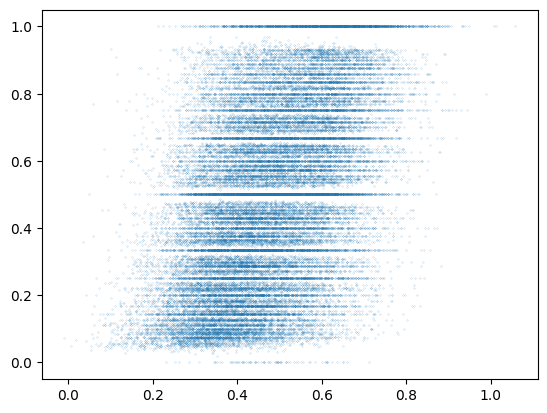

In [10]:
from matplotlib import pyplot as plt

plt.scatter(prediction, testY, s= 0.01)
plt.show()

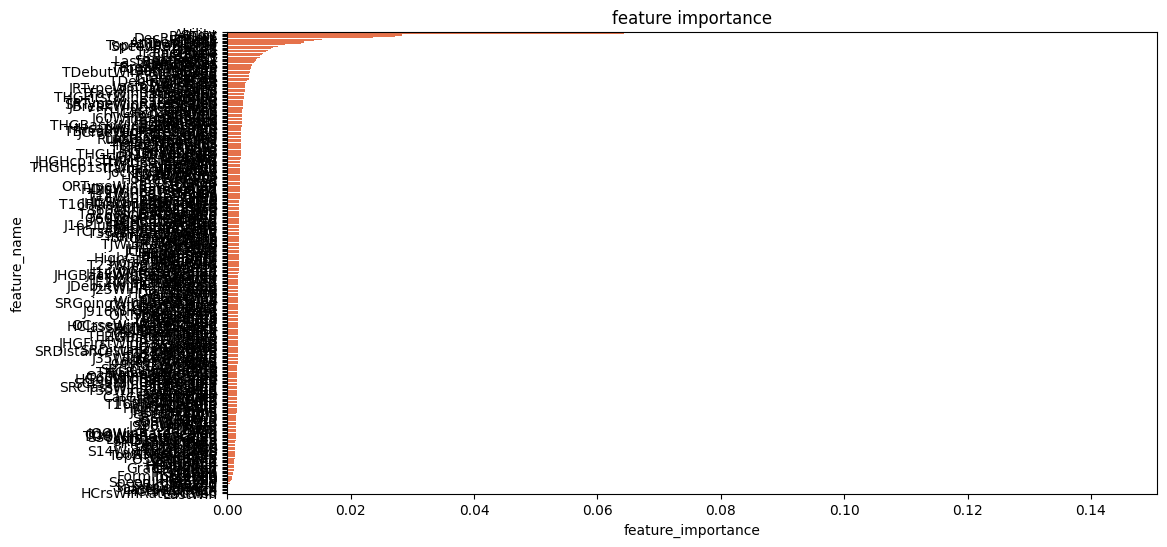

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.figure(figsize=(12, 6))
df_plt = pd.DataFrame({'feature_name': trainX.columns, 'feature_importance': model.feature_importances_})
df_plt.sort_values('feature_importance', ascending=False, inplace=True)
sns.barplot(x="feature_importance", y="feature_name", data=df_plt,color='#FF6631')
plt.title('feature importance')
plt.show()

In [12]:
print(df_plt)

          feature_name  feature_importance
4              Ability            0.143578
196              Short            0.064252
209            RelTips            0.028396
166         DecRunners            0.027245
7                 Rank            0.023577
..                 ...                 ...
151       LastBestForm            0.000000
81            HHcapRun            0.000000
215        HCrsWinRate            0.000000
216  HCrsWinRateScaled            0.000000
159            LastWin            0.000000

[333 rows x 2 columns]


In [13]:
def roi(odds, position, prediction):
    frame = {"oods": np.array(odds),
             "position" : np.array(position),
             "prediction":  np.array(prediction)}
    frame = pd.DataFrame(frame)
    frame = frame.drop(frame[frame["prediction"] != 1].index)
    bets = len(frame)
    frame2 = frame.drop(frame[frame["position"] != frame["prediction"]].index)
    returns = frame2["oods"].sum()
    return returns - bets, bets, frame



In [14]:
#testOdds = testX["DecOdds"]
testOdds = cleanDF[cleanDF.index.isin(testY.index)]["DecOdds"]
positions = cleanDF["Position"]
testPos = positions[split:]
#runners = np.array(testX["DecRunners"])
runners = np.array(cleanDF[cleanDF.index.isin(testY.index)]["DecRunners"])
predictionInt = (prediction*runners).astype(int)

from sklearn.metrics import accuracy_score

returns, bets, frame = roi(testOdds, testPos, predictionInt)
print(accuracy_score(testPos, predictionInt))
print(returns, bets)

0.13918391381152814
-37.889999999999986 883


In [15]:
import pickle
with open("XGBRegressorNoOdds.obj", "wb") as outFile:
    pickle.dump(model, outFile)